<a href="https://colab.research.google.com/github/JoaoAlexandreFerreira/RNA/blob/main/Visualiza%C3%A7%C3%A3o_dos_Custos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from keras.models import Sequential
from keras.layers import Dense
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.metrics import  MeanRelativeError

In [16]:
#Carregando o dataset e separando em teste e treino
df = pd.read_csv('data_cov (1).csv')
y = df['cov']
x = df.drop('cov', axis = 1)

x_treino, x_teste = x[0:86], x[86:]
y_treino, y_teste = y[0:86], y[86:]
'''
x_treino.insert(5, 'Cov',y_treino)
x_treino = x_treino.sort_values(by='flow_distance_ratio')

y_treino = x_treino['Cov']
x_treino = x_treino.drop('Cov', axis = 1)
'''
scaler = MinMaxScaler()
x_treino_normalizado = scaler.fit_transform(x_treino)
x_teste_normalizado = scaler.transform(x_teste)

In [17]:
funcoes = ['tanh', 'relu', 'sigmoid', 'LeakyReLU']
taxas = [0.005, 0.01, 0.05]

In [18]:
def modelo_RNA(x, activation, nos, camadas_ocultas):
  modelo = Sequential()
  modelo.add(tf.keras.layers.Input(shape=(x.shape[1],)))
  #modelo.add(keras.layers.Dense(nos, activation='relu', input_shape=x.shape))
  for i in range(camadas_ocultas):
    modelo.add(keras.layers.Dense(nos, activation=activation))
    modelo.add(keras.layers.Dropout(0.2))
  modelo.add(keras.layers.Dense(1, activation= 'linear'))
  modelo.summary()

  return modelo

def treino_modelo(modelo, optimizer, loss, metrics, x_treino, y_treino, x_teste, y_teste, itr):
  modelo.compile(optimizer=optimizer, loss=loss, metrics=metrics)

  resultado = modelo.fit(x_treino, y_treino, epochs=itr, batch_size=5, validation_data=(x_teste, y_teste))

  return resultado, modelo

def erro_relativo(y_pred, y_true):
  return np.mean(np.abs((y_true - y_pred) / y_true))

In [19]:
resultados = list()
erros_relativos = list()
for i in funcoes:
  #modelo = modelo_RNA(x_treino, i, 40, 11)
  for j in taxas:
      otimizador = tf.keras.optimizers.Adam(learning_rate=j)
      modelo = modelo_RNA(x_treino, i, 40, 11)
      resultado, modelo = treino_modelo(modelo, 'adam', 'mse', ['mae'], x_treino, y_treino, x_teste, y_teste, 350)
      resultado = pd.DataFrame(resultado.history)
      resultados.append(resultado)
      y_pred = modelo.predict(x_treino)
      y_pred = pd.DataFrame(y_pred)
      erro = erro_relativo(y_pred, y_treino)
      erros_relativos.append(erro)
      '''
      plt.plot(resultado.history['loss'])
      plt.plot(resultado.history['val_loss'])
      plt.title('Histórico de Treinamento')
      plt.ylabel('Loss (MSE)')
      plt.xlabel('Épocas de treinamento')
      plt.legend(['Erro treino', 'Erro teste'])
      plt.show()
      '''

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_156 (Dense)           (None, 40)                240       
                                                                 
 dropout_143 (Dropout)       (None, 40)                0         
                                                                 
 dense_157 (Dense)           (None, 40)                1640      
                                                                 
 dropout_144 (Dropout)       (None, 40)                0         
                                                                 
 dense_158 (Dense)           (None, 40)                1640      
                                                                 
 dropout_145 (Dropout)       (None, 40)                0         
                                                                 
 dense_159 (Dense)           (None, 40)              

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


                                                                 
 dense_173 (Dense)           (None, 40)                1640      
                                                                 
 dropout_159 (Dropout)       (None, 40)                0         
                                                                 
 dense_174 (Dense)           (None, 40)                1640      
                                                                 
 dropout_160 (Dropout)       (None, 40)                0         
                                                                 
 dense_175 (Dense)           (None, 40)                1640      
                                                                 
 dropout_161 (Dropout)       (None, 40)                0         
                                                                 
 dense_176 (Dense)           (None, 40)                1640      
                                                                 
 dropout_1

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_180 (Dense)           (None, 40)                240       
                                                                 
 dropout_165 (Dropout)       (None, 40)                0         
                                                                 
 dense_181 (Dense)           (None, 40)                1640      
                                                                 
 dropout_166 (Dropout)       (None, 40)                0         
                                                                 
 dense_182 (Dense)           (None, 40)                1640      
                                                                 
 dropout_167 (Dropout)       (None, 40)                0         
                                                                 
 dense_183 (Dense)           (None, 40)              

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


                                                                 
 dense_193 (Dense)           (None, 40)                1640      
                                                                 
 dropout_177 (Dropout)       (None, 40)                0         
                                                                 
 dense_194 (Dense)           (None, 40)                1640      
                                                                 
 dropout_178 (Dropout)       (None, 40)                0         
                                                                 
 dense_195 (Dense)           (None, 40)                1640      
                                                                 
 dropout_179 (Dropout)       (None, 40)                0         
                                                                 
 dense_196 (Dense)           (None, 40)                1640      
                                                                 
 dropout_1

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


                                                                 
 dropout_190 (Dropout)       (None, 40)                0         
                                                                 
 dense_208 (Dense)           (None, 40)                1640      
                                                                 
 dropout_191 (Dropout)       (None, 40)                0         
                                                                 
 dense_209 (Dense)           (None, 40)                1640      
                                                                 
 dropout_192 (Dropout)       (None, 40)                0         
                                                                 
 dense_210 (Dense)           (None, 40)                1640      
                                                                 
 dropout_193 (Dropout)       (None, 40)                0         
                                                                 
 dense_211

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


 dense_217 (Dense)           (None, 40)                1640      
                                                                 
 dropout_199 (Dropout)       (None, 40)                0         
                                                                 
 dense_218 (Dense)           (None, 40)                1640      
                                                                 
 dropout_200 (Dropout)       (None, 40)                0         
                                                                 
 dense_219 (Dense)           (None, 40)                1640      
                                                                 
 dropout_201 (Dropout)       (None, 40)                0         
                                                                 
 dense_220 (Dense)           (None, 40)                1640      
                                                                 
 dropout_202 (Dropout)       (None, 40)                0         
          

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


                                                                 
 dropout_213 (Dropout)       (None, 40)                0         
                                                                 
 dense_233 (Dense)           (None, 40)                1640      
                                                                 
 dropout_214 (Dropout)       (None, 40)                0         
                                                                 
 dense_234 (Dense)           (None, 40)                1640      
                                                                 
 dropout_215 (Dropout)       (None, 40)                0         
                                                                 
 dense_235 (Dense)           (None, 40)                1640      
                                                                 
 dropout_216 (Dropout)       (None, 40)                0         
                                                                 
 dense_236

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_240 (Dense)           (None, 40)                240       
                                                                 
 dropout_220 (Dropout)       (None, 40)                0         
                                                                 
 dense_241 (Dense)           (None, 40)                1640      
                                                                 
 dropout_221 (Dropout)       (None, 40)                0         
                                                                 
 dense_242 (Dense)           (None, 40)                1640      
                                                                 
 dropout_222 (Dropout)       (None, 40)                0         
                                                                 
 dense_243 (Dense)           (None, 40)              

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


                                                                 
 dense_257 (Dense)           (None, 40)                1640      
                                                                 
 dropout_236 (Dropout)       (None, 40)                0         
                                                                 
 dense_258 (Dense)           (None, 40)                1640      
                                                                 
 dropout_237 (Dropout)       (None, 40)                0         
                                                                 
 dense_259 (Dense)           (None, 40)                1640      
                                                                 
 dropout_238 (Dropout)       (None, 40)                0         
                                                                 
 dense_260 (Dense)           (None, 40)                1640      
                                                                 
 dropout_2

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_264 (Dense)           (None, 40)                240       
                                                                 
 dropout_242 (Dropout)       (None, 40)                0         
                                                                 
 dense_265 (Dense)           (None, 40)                1640      
                                                                 
 dropout_243 (Dropout)       (None, 40)                0         
                                                                 
 dense_266 (Dense)           (None, 40)                1640      
                                                                 
 dropout_244 (Dropout)       (None, 40)                0         
                                                                 
 dense_267 (Dense)           (None, 40)              

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


 dense_276 (Dense)           (None, 40)                240       
                                                                 
 dropout_253 (Dropout)       (None, 40)                0         
                                                                 
 dense_277 (Dense)           (None, 40)                1640      
                                                                 
 dropout_254 (Dropout)       (None, 40)                0         
                                                                 
 dense_278 (Dense)           (None, 40)                1640      
                                                                 
 dropout_255 (Dropout)       (None, 40)                0         
                                                                 
 dense_279 (Dense)           (None, 40)                1640      
                                                                 
 dropout_256 (Dropout)       (None, 40)                0         
          

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_288 (Dense)           (None, 40)                240       
                                                                 
 dropout_264 (Dropout)       (None, 40)                0         
                                                                 
 dense_289 (Dense)           (None, 40)                1640      
                                                                 
 dropout_265 (Dropout)       (None, 40)                0         
                                                                 
 dense_290 (Dense)           (None, 40)                1640      
                                                                 
 dropout_266 (Dropout)       (None, 40)                0         
                                                                 
 dense_291 (Dense)           (None, 40)              

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [20]:
resultados

[         loss       mae  val_loss   val_mae
 0    0.175210  0.345271  0.003942  0.058652
 1    0.090000  0.247114  0.004112  0.060430
 2    0.100610  0.255825  0.001503  0.037011
 3    0.064335  0.195763  0.001121  0.026579
 4    0.062428  0.187573  0.002862  0.048840
 ..        ...       ...       ...       ...
 345  0.004924  0.028834  0.001226  0.028246
 346  0.005485  0.042340  0.001159  0.027240
 347  0.004606  0.029785  0.002336  0.043162
 348  0.003640  0.032923  0.003250  0.052704
 349  0.004141  0.034487  0.002295  0.042689
 
 [350 rows x 4 columns],
          loss       mae  val_loss   val_mae
 0    0.188606  0.340928  0.028332  0.166606
 1    0.153536  0.291474  0.062951  0.249894
 2    0.135927  0.297504  0.002184  0.044256
 3    0.081854  0.236055  0.004192  0.061109
 4    0.089231  0.235586  0.004145  0.060649
 ..        ...       ...       ...       ...
 345  0.003122  0.027778  0.002417  0.044195
 346  0.002696  0.025643  0.003343  0.053701
 347  0.003946  0.037615  0.

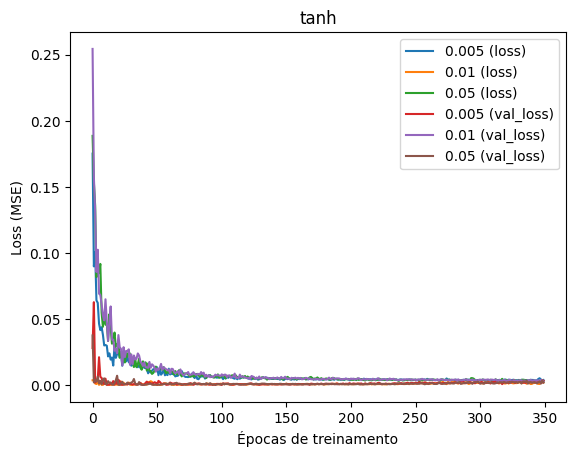

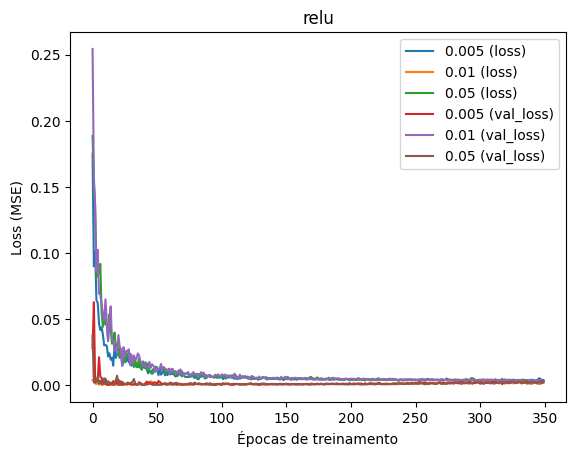

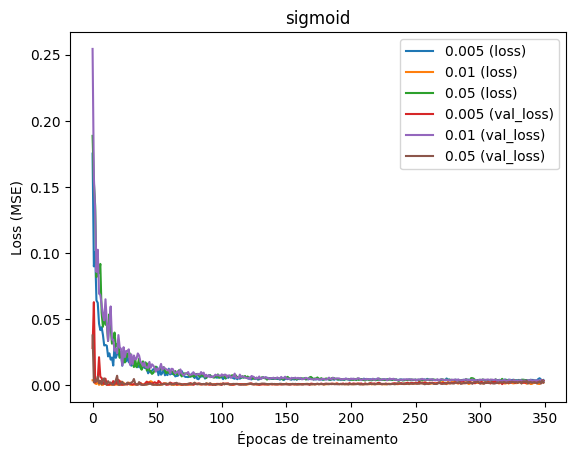

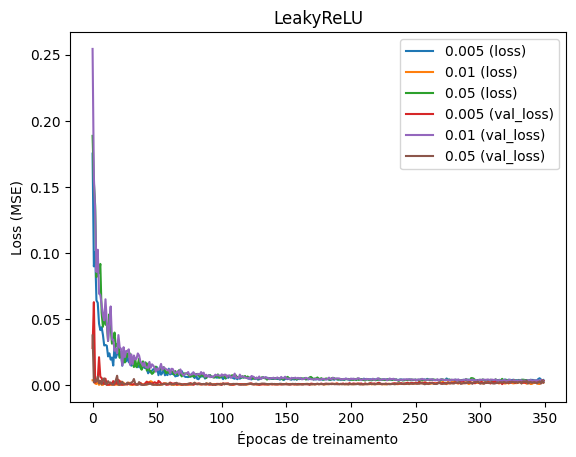

In [21]:
for i in range(0, len(funcoes)):
  for j in range(0, len(taxas)):
    plt.plot(resultados[j]['loss'])
    plt.plot(resultados[j]['val_loss'])
  plt.title(funcoes[i])
  plt.ylabel('Loss (MSE)')
  plt.xlabel('Épocas de treinamento')
  plt.legend(['0.005 (loss)', '0.01 (loss)', '0.05 (loss)', '0.005 (val_loss)', '0.01 (val_loss)', '0.05 (val_loss)'])
  plt.show()

In [22]:
x_treino, x_teste, y_treino, y_teste, = train_test_split(x , y, test_size = 10, random_state = None)

In [23]:
resultados_a = list()
erros_relativos_a = list()
for i in funcoes:
  #modelo = modelo_RNA(x_treino, i, 40, 11)
  for j in taxas:
      otimizador = tf.keras.optimizers.Adam(learning_rate=j)
      modelo = modelo_RNA(x_treino, i, 40, 11)
      resultado, modelo = treino_modelo(modelo, 'adam', 'mse', ['mae'], x_treino, y_treino, x_teste, y_teste, 350)
      resultado = pd.DataFrame(resultado.history)
      resultados_a.append(resultado)
      y_pred = modelo.predict(x_treino)
      y_pred = pd.DataFrame(y_pred)
      erro = erro_relativo(y_pred, y_treino)
      erros_relativos.append(erro)
      '''
      plt.plot(resultado.history['loss'])
      plt.plot(resultado.history['val_loss'])
      plt.title('Histórico de Treinamento')
      plt.ylabel('Loss (MSE)')
      plt.xlabel('Épocas de treinamento')
      plt.legend(['Erro treino', 'Erro teste'])
      plt.show()
      '''

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_300 (Dense)           (None, 40)                240       
                                                                 
 dropout_275 (Dropout)       (None, 40)                0         
                                                                 
 dense_301 (Dense)           (None, 40)                1640      
                                                                 
 dropout_276 (Dropout)       (None, 40)                0         
                                                                 
 dense_302 (Dense)           (None, 40)                1640      
                                                                 
 dropout_277 (Dropout)       (None, 40)                0         
                                                                 
 dense_303 (Dense)           (None, 40)              

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_312 (Dense)           (None, 40)                240       
                                                                 
 dropout_286 (Dropout)       (None, 40)                0         
                                                                 
 dense_313 (Dense)           (None, 40)                1640      
                                                                 
 dropout_287 (Dropout)       (None, 40)                0         
                                                                 
 dense_314 (Dense)           (None, 40)                1640      
                                                                 
 dropout_288 (Dropout)       (None, 40)                0         
                                                                 
 dense_315 (Dense)           (None, 40)              

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


                                                                 
 dense_328 (Dense)           (None, 40)                1640      
                                                                 
 dropout_301 (Dropout)       (None, 40)                0         
                                                                 
 dense_329 (Dense)           (None, 40)                1640      
                                                                 
 dropout_302 (Dropout)       (None, 40)                0         
                                                                 
 dense_330 (Dense)           (None, 40)                1640      
                                                                 
 dropout_303 (Dropout)       (None, 40)                0         
                                                                 
 dense_331 (Dense)           (None, 40)                1640      
                                                                 
 dropout_3

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


 dropout_310 (Dropout)       (None, 40)                0         
                                                                 
 dense_339 (Dense)           (None, 40)                1640      
                                                                 
 dropout_311 (Dropout)       (None, 40)                0         
                                                                 
 dense_340 (Dense)           (None, 40)                1640      
                                                                 
 dropout_312 (Dropout)       (None, 40)                0         
                                                                 
 dense_341 (Dense)           (None, 40)                1640      
                                                                 
 dropout_313 (Dropout)       (None, 40)                0         
                                                                 
 dense_342 (Dense)           (None, 40)                1640      
          

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


                                                                 
 dense_350 (Dense)           (None, 40)                1640      
                                                                 
 dropout_321 (Dropout)       (None, 40)                0         
                                                                 
 dense_351 (Dense)           (None, 40)                1640      
                                                                 
 dropout_322 (Dropout)       (None, 40)                0         
                                                                 
 dense_352 (Dense)           (None, 40)                1640      
                                                                 
 dropout_323 (Dropout)       (None, 40)                0         
                                                                 
 dense_353 (Dense)           (None, 40)                1640      
                                                                 
 dropout_3

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


                                                                 
 dropout_331 (Dropout)       (None, 40)                0         
                                                                 
 dense_362 (Dense)           (None, 40)                1640      
                                                                 
 dropout_332 (Dropout)       (None, 40)                0         
                                                                 
 dense_363 (Dense)           (None, 40)                1640      
                                                                 
 dropout_333 (Dropout)       (None, 40)                0         
                                                                 
 dense_364 (Dense)           (None, 40)                1640      
                                                                 
 dropout_334 (Dropout)       (None, 40)                0         
                                                                 
 dense_365

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


 dropout_347 (Dropout)       (None, 40)                0         
                                                                 
 dense_379 (Dense)           (None, 40)                1640      
                                                                 
 dropout_348 (Dropout)       (None, 40)                0         
                                                                 
 dense_380 (Dense)           (None, 40)                1640      
                                                                 
 dropout_349 (Dropout)       (None, 40)                0         
                                                                 
 dense_381 (Dense)           (None, 40)                1640      
                                                                 
 dropout_350 (Dropout)       (None, 40)                0         
                                                                 
 dense_382 (Dense)           (None, 40)                1640      
          

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


 dropout_354 (Dropout)       (None, 40)                0         
                                                                 
 dense_387 (Dense)           (None, 40)                1640      
                                                                 
 dropout_355 (Dropout)       (None, 40)                0         
                                                                 
 dense_388 (Dense)           (None, 40)                1640      
                                                                 
 dropout_356 (Dropout)       (None, 40)                0         
                                                                 
 dense_389 (Dense)           (None, 40)                1640      
                                                                 
 dropout_357 (Dropout)       (None, 40)                0         
                                                                 
 dense_390 (Dense)           (None, 40)                1640      
          

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_396 (Dense)           (None, 40)                240       
                                                                 
 dropout_363 (Dropout)       (None, 40)                0         
                                                                 
 dense_397 (Dense)           (None, 40)                1640      
                                                                 
 dropout_364 (Dropout)       (None, 40)                0         
                                                                 
 dense_398 (Dense)           (None, 40)                1640      
                                                                 
 dropout_365 (Dropout)       (None, 40)                0         
                                                                 
 dense_399 (Dense)           (None, 40)              

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


                                                                 
 dense_409 (Dense)           (None, 40)                1640      
                                                                 
 dropout_375 (Dropout)       (None, 40)                0         
                                                                 
 dense_410 (Dense)           (None, 40)                1640      
                                                                 
 dropout_376 (Dropout)       (None, 40)                0         
                                                                 
 dense_411 (Dense)           (None, 40)                1640      
                                                                 
 dropout_377 (Dropout)       (None, 40)                0         
                                                                 
 dense_412 (Dense)           (None, 40)                1640      
                                                                 
 dropout_3

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_420 (Dense)           (None, 40)                240       
                                                                 
 dropout_385 (Dropout)       (None, 40)                0         
                                                                 
 dense_421 (Dense)           (None, 40)                1640      
                                                                 
 dropout_386 (Dropout)       (None, 40)                0         
                                                                 
 dense_422 (Dense)           (None, 40)                1640      
                                                                 
 dropout_387 (Dropout)       (None, 40)                0         
                                                                 
 dense_423 (Dense)           (None, 40)              

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


 dropout_398 (Dropout)       (None, 40)                0         
                                                                 
 dense_435 (Dense)           (None, 40)                1640      
                                                                 
 dropout_399 (Dropout)       (None, 40)                0         
                                                                 
 dense_436 (Dense)           (None, 40)                1640      
                                                                 
 dropout_400 (Dropout)       (None, 40)                0         
                                                                 
 dense_437 (Dense)           (None, 40)                1640      
                                                                 
 dropout_401 (Dropout)       (None, 40)                0         
                                                                 
 dense_438 (Dense)           (None, 40)                1640      
          

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


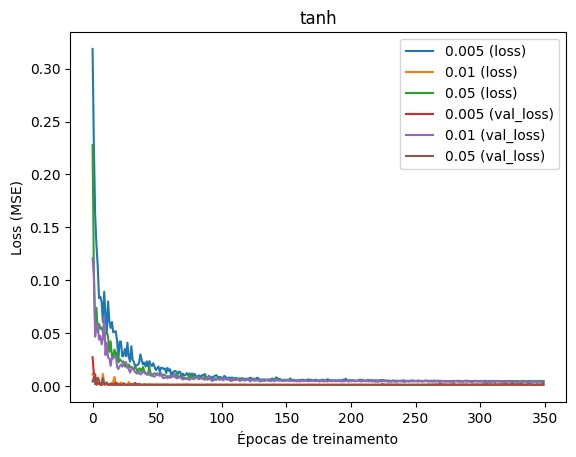

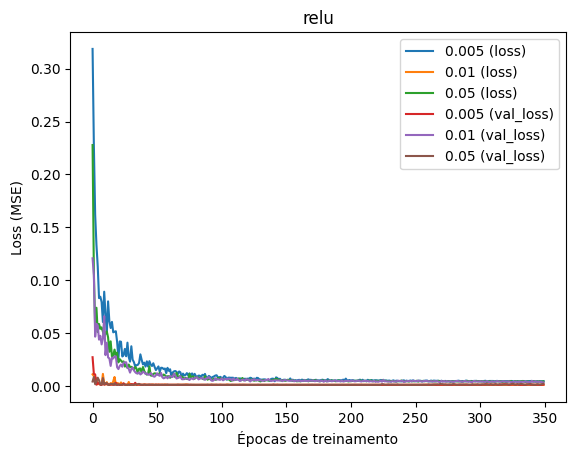

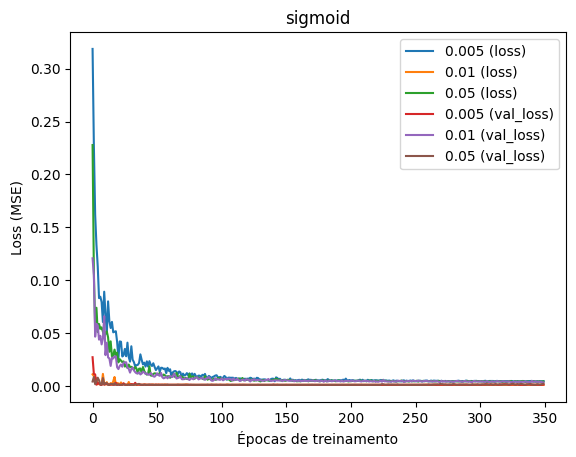

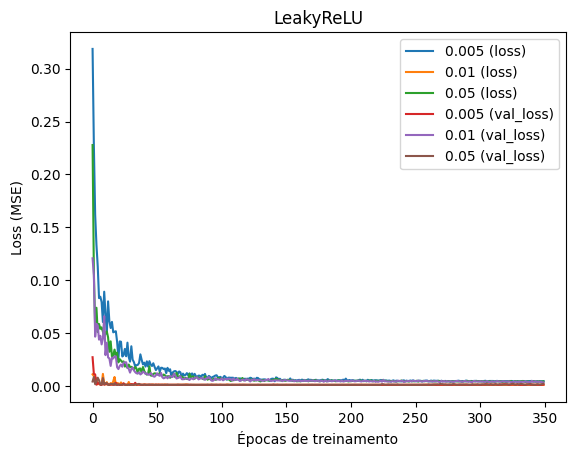

In [24]:
for i in range(0, len(funcoes)):
  for j in range(0, len(taxas)):
    plt.plot(resultados_a[j]['loss'])
    plt.plot(resultados_a[j]['val_loss'])
  plt.title(funcoes[i])
  plt.ylabel('Loss (MSE)')
  plt.xlabel('Épocas de treinamento')
  plt.legend(['0.005 (loss)', '0.01 (loss)', '0.05 (loss)', '0.005 (val_loss)', '0.01 (val_loss)', '0.05 (val_loss)'])
  plt.show()